<a href="https://colab.research.google.com/github/hukim1112/MLDL/blob/master/object_detection/json_parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!gdown --id 1syfpdmaB8IF2BrcsU27pF5T2QHa9HEzq
!gdown --id 1Wy2nTq89Sgcv4nZ49S30o4gw-Q1MtmAi

Downloading...
From: https://drive.google.com/uc?id=1syfpdmaB8IF2BrcsU27pF5T2QHa9HEzq
To: /content/images.zip
100% 44.7M/44.7M [00:00<00:00, 252MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Wy2nTq89Sgcv4nZ49S30o4gw-Q1MtmAi
To: /content/sample.json
100% 230k/230k [00:00<00:00, 81.7MB/s]


In [8]:
!unzip images.zip

Archive:  images.zip
replace images/03212.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### 파이썬 dictionary를 json으로 읽고 쓰기

ref : https://www.daleseo.com/python-json/

In [9]:
import json

json_string = {  "id": 1,
                  "username": "Bret",
                  "email": "Sincere@april.biz",
                  "address": {
                      "street": "Kulas Light",
                      "suite": "Apt. 556",
                      "city": "Gwenborough",
                      "zipcode": "92998-3874"
                              },
                  "admin": False,
                  "hobbies": None
              }

In [10]:
json_string.keys()

dict_keys(['id', 'username', 'email', 'address', 'admin', 'hobbies'])

In [11]:
json_string["address"]

{'city': 'Gwenborough',
 'street': 'Kulas Light',
 'suite': 'Apt. 556',
 'zipcode': '92998-3874'}

In [13]:
# json file 저장
with open("example.json", "w") as file:
  json.dump(json_string, file, indent=2)

In [14]:
# json file 읽기
with open("example.json", "r") as file:
  loaded_json = json.load(file)

In [15]:
loaded_json

{'address': {'city': 'Gwenborough',
  'street': 'Kulas Light',
  'suite': 'Apt. 556',
  'zipcode': '92998-3874'},
 'admin': False,
 'email': 'Sincere@april.biz',
 'hobbies': None,
 'id': 1,
 'username': 'Bret'}

# coco json(sample.json)으로부터 annotation을 읽어서 image_id == 1의 이미지에 바운딩박스 그리기

- opencv를 사용해서 첫 번째 이미지를 읽어오기
- sample.json에서 해당 이미지에 대한 annotation 읽어오기(bbox)
- opencv rectangle 함수로 이미지 위에 박스 그리기
- matplotlib로 이미지 시각화하기

### 1. 첫번째 이미지 읽어오기

In [16]:
with open("sample.json", "r") as file:
  coco_style_json = json.load(file)

In [18]:
print(coco_style_json.keys())

dict_keys(['info', 'images', 'annotations', 'categories', 'source', 'last_image_id', 'last_annotation_id'])


In [19]:
print(type(coco_style_json["images"]), len(coco_style_json["images"])) #이미지 리스트의 수는 159개

<class 'list'> 159


In [20]:
coco_style_json["images"][0] #첫번째 이미지의 정보

{'date_captured': None,
 'file_name': '03212.jpg',
 'height': '944',
 'id': 1,
 'source': 1,
 'width': '1418'}

In [21]:
import os
import cv2
file_name = coco_style_json["images"][0]["file_name"]
path = os.path.join("/content/images", file_name)
image = cv2.imread(path)[:,:,::-1] #BGR to RGB
print(image.shape)

(944, 1418, 3)


## 2. 어노테이션 읽어오기

In [22]:
print(type(coco_style_json["annotations"]), len(coco_style_json["annotations"])) #어노테이션 리스트의 수는 1203개

<class 'list'> 1203


In [24]:
coco_style_json["annotations"][:4] #image_id == 1인 어노테이션 4개

[{'area': None,
  'bbox': [957, 658, 42, 57],
  'category_id': 2,
  'id': 1,
  'image_id': 1,
  'iscrowd': 1,
  'segmentation': None},
 {'area': None,
  'bbox': [680, 537, 51, 65],
  'category_id': 2,
  'id': 2,
  'image_id': 1,
  'iscrowd': 1,
  'segmentation': None},
 {'area': None,
  'bbox': [468, 682, 29, 34],
  'category_id': 2,
  'id': 3,
  'image_id': 1,
  'iscrowd': 1,
  'segmentation': None},
 {'area': None,
  'bbox': [399, 634, 48, 53],
  'category_id': 2,
  'id': 4,
  'image_id': 1,
  'iscrowd': 1,
  'segmentation': None}]

## 3. 이미지 위에 어노테이션 그리기

In [29]:
annotations = coco_style_json["annotations"][:4]
drawn_image = image.copy()
for anno in annotations:
  x,y,w,h = anno["bbox"]
  cv2.rectangle(drawn_image, (x,y), (x+w,y+h), color=(0,255,0),thickness=10)

## 4. 시각화

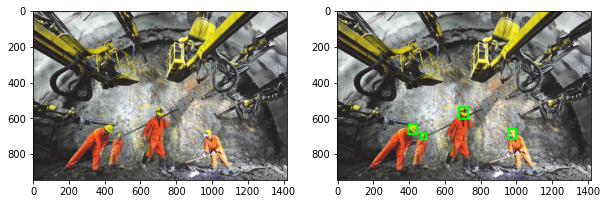

In [34]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(drawn_image)

plt.show()